In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data


In [2]:
df = pd.read_csv('../data/raw/train.csv')

## Explore the dataset

### Overview

In [19]:
print('Shape:', df.shape)
df.head()


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Info:',df.info())


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB
Info: None


In [23]:
print('DTypes:\n',df.dtypes)
df.describe()

DTypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing values

In [22]:
# Get missing values
missing = df.isnull().sum()
# Filter out columns with no missing values
missing = missing[missing > 0]
# Sort missing values in descending order
missing = missing.sort_values(ascending=False)

print("Columns with missing values:\n", missing)

Columns with missing values:
 Cabin       687
Age         177
Embarked      2
dtype: int64


### Duplicates

In [6]:
duplicates = df.duplicated().sum()

print("Number of duplicate rows:\n", duplicates)

Number of duplicate rows:
 0


### Outliers

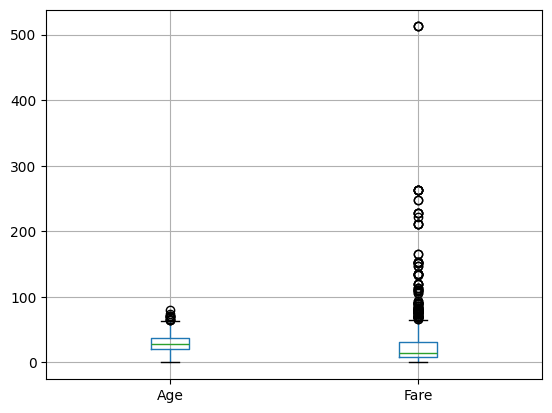

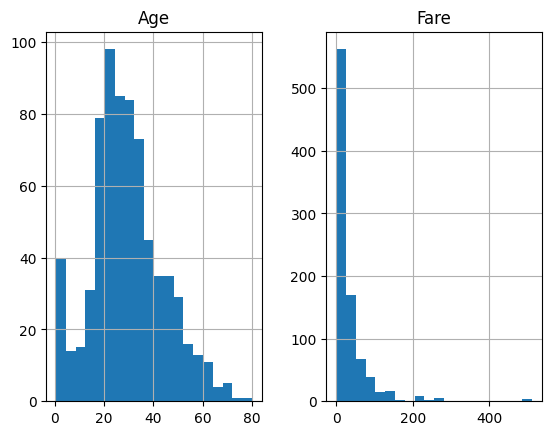

In [24]:
df[['Age', 'Fare']].boxplot()
df[['Age', 'Fare']].hist(bins=20)
plt.show()

In [25]:
# Calculate IQR for 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
# Identify outliers in 'Fare' column
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
outliers[['Fare']].describe()

,Fare
count,116.000000
mean,128.291629
std,84.636908
min,66.600000
25%,78.189600
50%,90.000000
75%,147.778100
max,512.329200


#### Summary
**Data types**
- Numerical (continuous): Age, Fare
- Numerical (discrete): SibSp, Parch
- Categorical (encoded as int): Survived, Pclass
- Categorical (string): Name, Sex, Cabin, Embarked

**Missing values**
- Cabin: 687 (majority missing)
- Age: 177
- Embarked: 2

**Outliers**
- Age: no clear invalid values
- Fare: Heavily right-skewed, small number of very expensive tickets. No clear invalid values


## Visualise data

### Survival rate

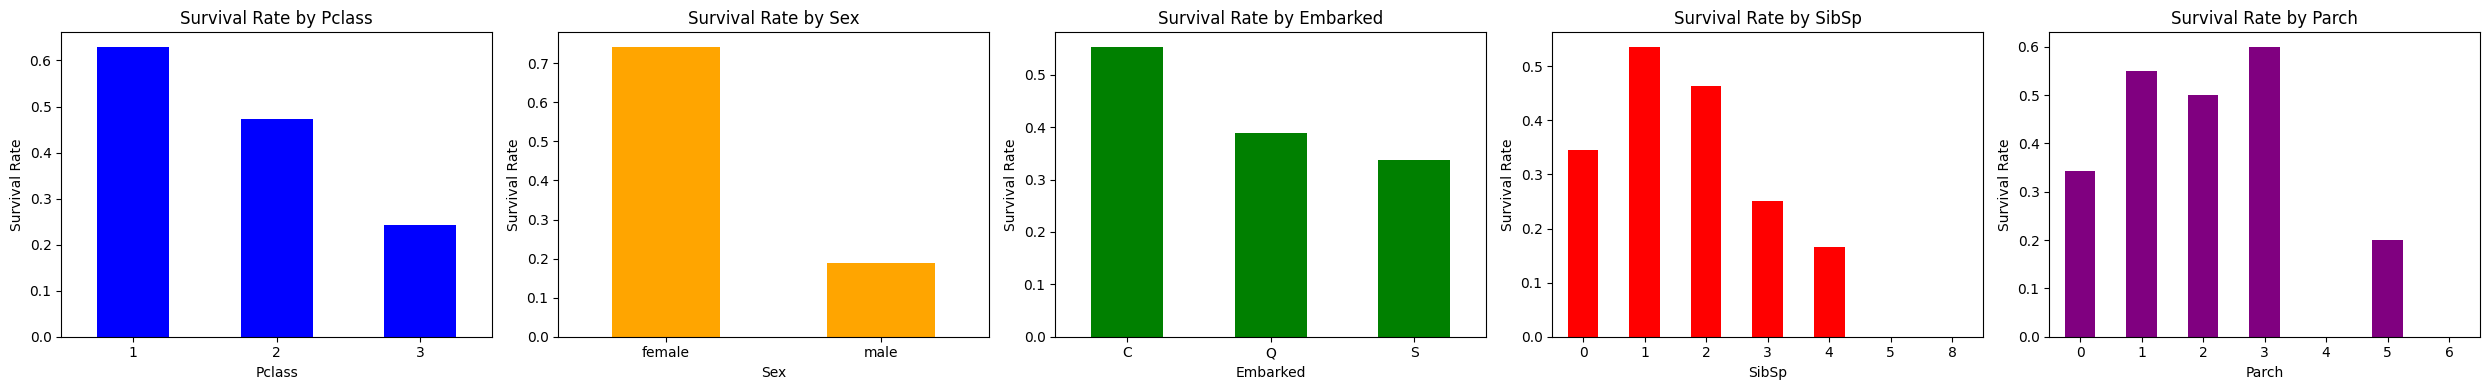

In [ ]:
def plot_survival_rate_by_categories(df, categories, colors=None):
    n = len(categories)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    if n == 1:
        axes = [axes]
    
    for i, category in enumerate(categories):
        survival_rates = df.groupby(category)['Survived'].mean()
        color = colors[i] if colors else None
        survival_rates.plot(kind='bar', ax=axes[i], color=color)
        axes[i].set_title(f'Survival Rate by {category}')
        axes[i].set_ylabel('Survival Rate')
        axes[i].set_xlabel(category)
        axes[i].set_xticklabels(survival_rates.index, rotation=0)

    plt.tight_layout()
    plt.show()

plot_survival_rate_by_categories(
    df,
    ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch'],
    colors=['blue', 'orange', 'green', 'red', 'purple']
)


In [43]:
def survival_rate_percentage_by_categories(df, categories):
    tables = []
    for category in categories:
        #  Count and mean of 'Survived'
        group = df.groupby(category)['Survived'].agg(['count', 'mean'])
        group = group.rename(columns={'count': 'Count', 'mean': 'Rate'})

        # Survival rate within the category
        group['SurvivalRate'] = (group['Rate'] * 100).round(1).astype(str) + '%'

        group['Feature'] = category
        tables.append(group.reset_index().rename(columns={category: 'Value'}))

    summary = pd.concat(tables, ignore_index=True)
    summary = summary[["Feature", "Value", "Count", "SurvivalRate"]]
    return summary

summary = survival_rate_percentage_by_categories(
    df,
    ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
)

summary

,Feature,Value,Count,SurvivalRate
0,Pclass,1,216,63.0%
1,Pclass,2,184,47.3%
2,Pclass,3,491,24.2%
3,Sex,female,314,74.2%
4,Sex,male,577,18.9%
5,Embarked,C,168,55.4%
6,Embarked,Q,77,39.0%
7,Embarked,S,644,33.7%
8,SibSp,0,608,34.5%
9,SibSp,1,209,53.6%


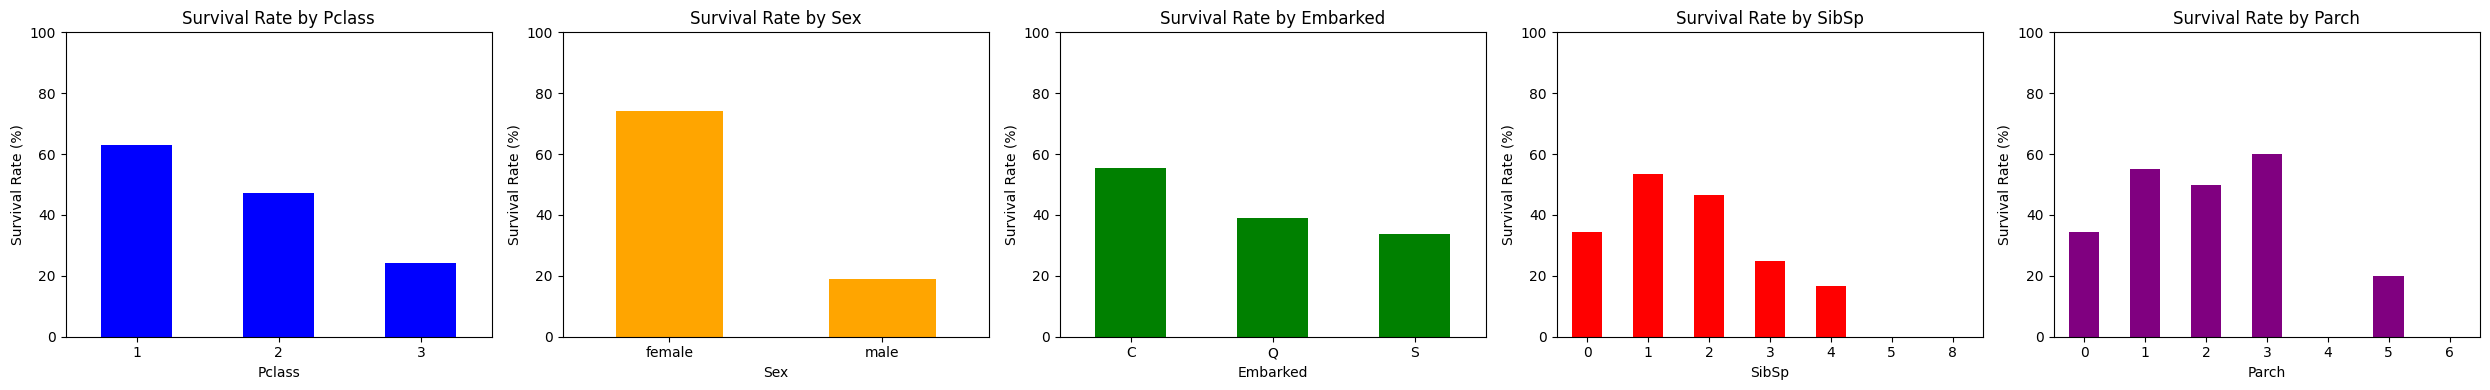

In [50]:
def plot_survival_rate_by_categories(df, categories, colors=None):
    n = len(categories)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    if n == 1:
        axes = [axes]

    for i, category in enumerate(categories):
        # Calculate survival rate in percent
        survival_rates = df.groupby(category)['Survived'].mean() * 100

        color = colors[i] if colors else None

        survival_rates.plot(
            kind='bar',
            ax=axes[i],
            color=color
        )

        axes[i].set_title(f'Survival Rate by {category}')
        axes[i].set_ylabel('Survival Rate (%)')
        axes[i].set_xlabel(category)
        axes[i].set_ylim(0, 100)
        axes[i].set_xticklabels(survival_rates.index, rotation=0)

    plt.tight_layout()
    plt.show()

plot_survival_rate_by_categories(
    df,
    ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch'],
    colors=['blue', 'orange', 'green', 'red', 'purple']
)